# Linear Regression

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [109]:
df = pd.read_csv("C:\\Users\\arjun\\OneDrive\\Desktop\\BTP\\B.Tech-Project---Federated-Learning\\Project_file\\Dataset\\HousingData.csv")

In [110]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [111]:
# print(df.head())
# print(df.shape)

In [113]:
# Checking for Nan columns
nan_columns = np.any(pd.isna(df), axis = 0)
nan_columns = list(nan_columns[nan_columns == True].index)
nan_columns

['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']

In [114]:
# filling nan columns with 0
for col in nan_columns:
    df[col] = df[col].fillna(0)

In [116]:
nan_columns = np.any(pd.isna(df), axis = 0)
nan_columns = list(nan_columns[nan_columns == True].index)
nan_columns

[]

In [117]:
df_X = list(df.columns)
df_X.remove('MEDV')
df_y = ['MEDV']

Normalizing Data

In [118]:
means, maxs, mins = dict(), dict(), dict()

In [119]:
for col in df:
    means[col] = df[col].mean()
    maxs[col] = df[col].max()
    mins[col] = df[col].min()

In [120]:
df = (df - df.mean()) / (df.max() - df.min())

In [121]:
numeric_x_df = pd.DataFrame(df, columns=df_X)
numeric_y_df = pd.DataFrame(df, columns=df_y)
numeric_x = torch.tensor(numeric_x_df.values, dtype=torch.float)
numeric_y = torch.tensor(numeric_y_df.values, dtype=torch.float)

Linear Regression Model

In [124]:
import torch
import torch.nn as nn

In [125]:
class Net(nn.Module):
    def __init__(self, D_in, H1, H2, H3, D_out):
        super(Net, self).__init__()
        
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, H3)
        self.linear4 = nn.Linear(H3, D_out)
        
    def forward(self, x):
        y_pred = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(y_pred).clamp(min=0)
        y_pred = self.linear3(y_pred).clamp(min=0)
        y_pred = self.linear4(y_pred)
        return y_pred

In [128]:
H1, H2, H3 = 500, 1000, 200
D_in, D_out = 13, 1

In [130]:
model4 = Net(D_in, H1, H2, H3, D_out)
criterion = nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model4.parameters(), lr=1e-4 * 2)

In [131]:
losses4 = []

for t in range(500):
    y_pred = model4(numeric_x)
    
    loss = criterion(y_pred, numeric_y)
    print(t, loss.item())
    losses4.append(loss.item())
    
    if torch.isnan(loss):
        break
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 23.998849868774414
1 19.017057418823242
2 16.279319763183594
3 14.652142524719238
4 13.519610404968262
5 12.564231872558594
6 11.76762866973877
7 11.184154510498047
8 10.739701271057129
9 10.226578712463379
10 9.53879165649414
11 8.786524772644043
12 8.153190612792969
13 7.699066162109375
14 7.329911708831787
15 6.994730472564697
16 6.746163368225098
17 6.551555633544922
18 6.281416416168213
19 5.957919120788574
20 5.721730709075928
21 5.5793914794921875
22 5.44747257232666
23 5.33348274230957
24 5.2077436447143555
25 5.018152713775635
26 4.845087051391602
27 4.736823558807373
28 4.63303804397583
29 4.531322479248047
30 4.432085990905762
31 4.301185131072998
32 4.179134845733643
33 4.094426155090332
34 4.013309478759766
35 3.9329521656036377
36 3.8526294231414795
37 3.757605791091919
38 3.6744213104248047
39 3.610971450805664
40 3.544649600982666
41 3.4790985584259033
42 3.407823085784912
43 3.331972360610962
44 3.270671844482422
45 3.2127161026000977
46 3.1513454914093018
47 3.09056

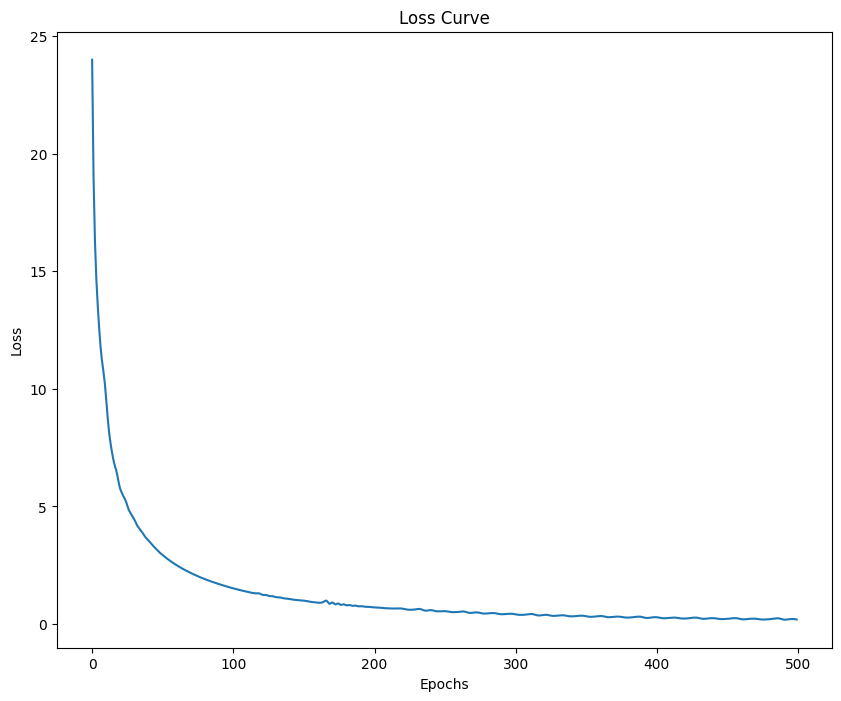

In [132]:
plt.figure(figsize=(10, 8))
plt.plot(range(len(losses4)), losses4)
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [137]:
print(model4.parameters()) 

<generator object Module.parameters at 0x0000023C868DBDD0>


In [138]:
for name, param in model4.named_parameters():
    if name in ['fc.weight', 'fc.bias']:
        param.requires_grad = True
    else:
        param.requires_grad = False

In [139]:
for name in model4.parameters():
    print(name, ':', param.requires_grad)

Parameter containing:
tensor([[-0.1969, -0.0027, -0.1347,  ...,  0.0684,  0.0208, -0.1749],
        [-0.0954,  0.0014, -0.1500,  ..., -0.2747,  0.0675,  0.0851],
        [-0.1817, -0.1518, -0.2008,  ..., -0.1676,  0.2322,  0.1696],
        ...,
        [ 0.2395, -0.0597, -0.0072,  ...,  0.1956,  0.2624,  0.0057],
        [-0.0140, -0.0451, -0.0989,  ..., -0.1493, -0.2131, -0.2020],
        [ 0.2250,  0.0867, -0.1443,  ...,  0.0576,  0.2634,  0.1840]]) : False
Parameter containing:
tensor([ 0.1792,  0.0533,  0.2019, -0.1976,  0.0230,  0.2635,  0.0748,  0.1762,
         0.0601, -0.2307, -0.0883,  0.1205, -0.1061, -0.0838, -0.2481,  0.1894,
         0.1248,  0.0363, -0.2150, -0.1751, -0.1843, -0.1872,  0.2278, -0.0227,
         0.1092,  0.0894,  0.1595,  0.1606,  0.1746,  0.1855, -0.1618,  0.1075,
         0.1616,  0.0110, -0.2101,  0.1161,  0.2658,  0.1278,  0.1694,  0.0287,
        -0.0938, -0.1027, -0.0282, -0.0418, -0.2157, -0.0990, -0.2675,  0.2644,
         0.0925,  0.2517,  0.2550,

In [141]:
print(model4.state_dict)

<bound method Module.state_dict of Net(
  (linear1): Linear(in_features=13, out_features=500, bias=True)
  (linear2): Linear(in_features=500, out_features=1000, bias=True)
  (linear3): Linear(in_features=1000, out_features=200, bias=True)
  (linear4): Linear(in_features=200, out_features=1, bias=True)
)>


# Test1

In [148]:
class Net1(nn.Module):
    def __init__(self, D_in, D_out):
        super(Net1, self).__init__()
        self.linear = nn.Linear(D_in, D_out)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [149]:
model_test = Net1(D_in, D_out)
criterion = nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model4.parameters(), lr=1e-4 * 2)

In [150]:
losses4 = []

for t in range(500):
    y_pred = model_test(numeric_x)
    
    loss = criterion(y_pred, numeric_y)
    print(t, loss.item())
    losses4.append(loss.item())
    
    if torch.isnan(loss):
        break
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 51.38085174560547
1 51.38085174560547
2 51.38085174560547
3 51.38085174560547
4 51.38085174560547
5 51.38085174560547
6 51.38085174560547
7 51.38085174560547
8 51.38085174560547
9 51.38085174560547
10 51.38085174560547
11 51.38085174560547
12 51.38085174560547
13 51.38085174560547
14 51.38085174560547
15 51.38085174560547
16 51.38085174560547
17 51.38085174560547
18 51.38085174560547
19 51.38085174560547
20 51.38085174560547
21 51.38085174560547
22 51.38085174560547
23 51.38085174560547
24 51.38085174560547
25 51.38085174560547
26 51.38085174560547
27 51.38085174560547
28 51.38085174560547
29 51.38085174560547
30 51.38085174560547
31 51.38085174560547
32 51.38085174560547
33 51.38085174560547
34 51.38085174560547
35 51.38085174560547
36 51.38085174560547
37 51.38085174560547
38 51.38085174560547
39 51.38085174560547
40 51.38085174560547
41 51.38085174560547
42 51.38085174560547
43 51.38085174560547
44 51.38085174560547
45 51.38085174560547
46 51.38085174560547
47 51.38085174560547
48

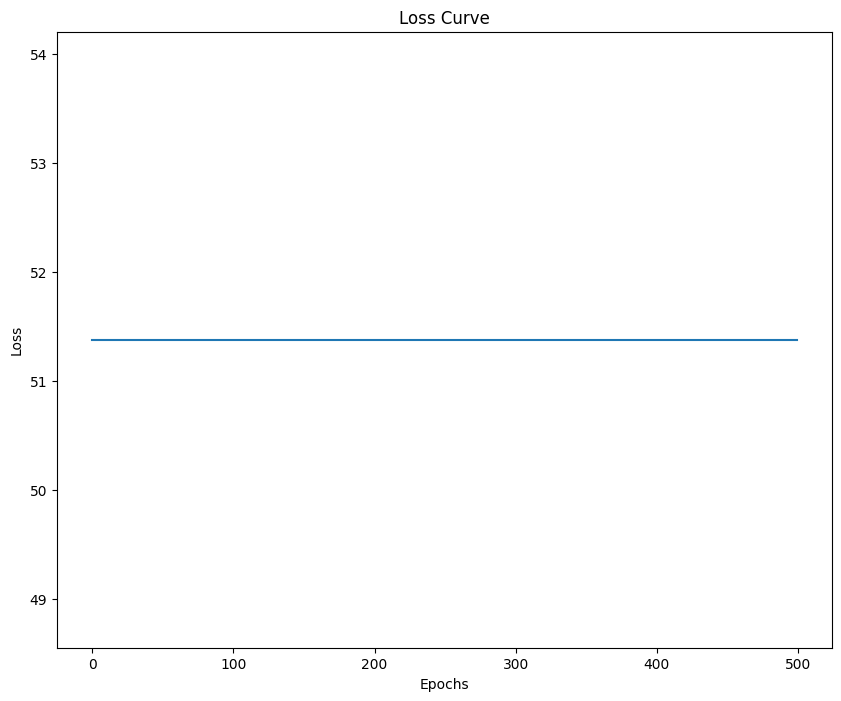

In [151]:
plt.figure(figsize=(10, 8))
plt.plot(range(len(losses4)), losses4)
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()